In [31]:
import pandas as pd
import os.path
import csv
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
#Loading CSV file

train_csv = pd.read_csv("../../archive/cough_trial_extended.csv")
train_csv.head()

In [ ]:
#Extracting features from Spectrogram

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
tot_rows = train_csv.shape[0]
file = open('features.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
    source = train_csv['file_properties'][i]
    file_name = '../../archive/trial_covid/' + source
  
    if os.path.isfile(file_name):
        print(file_name)
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{i} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} '    
        
        mfcc_means = []
        for e in mfcc:
            mfcc_means.append(np.mean(e))
            
        to_append = to_append + ' '.join(map(str, mfcc_means)) + ' ' + str(train_csv['class'][i]) 
        
        file = open('features.csv', 'a', newline= '')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split(' '))

In [32]:
features = pd.read_csv("features.csv")
print(features.shape)
features.head()


(170, 28)


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.87600,111.017365,-31.904015,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106426,-4.026825,not_covid
1,1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.15845,60.781284,-13.722886,...,-0.909973,7.216461,-1.719629,3.903021,3.653039,3.043882,2.439957,2.781968,2.195162,not_covid
2,2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.29790,48.581680,-15.522366,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906228,not_covid
3,3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.85730,75.765620,-7.648193,...,5.053118,-0.291308,0.987186,-2.447526,3.692367,2.312328,-2.059656,-4.772599,-0.503852,not_covid
4,4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.58800,104.156700,-32.228443,...,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,covid


In [36]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

features_only = features.drop(["filename", "label"], axis = 1)
features_normalize = normalize(features_only)
features_normalize.head()


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.663986,0.188802,0.186009,0.211393,0.213377,0.208436,0.459825,0.626572,0.481154,0.228675,...,0.716027,0.307730,0.629849,0.625876,0.692564,0.474647,0.409092,0.438186,0.425933,0.203612
1,0.692281,0.006360,0.470885,0.647178,0.507308,0.307875,0.234931,0.333720,0.622753,0.541054,...,0.726436,0.477306,0.888726,0.587726,0.919657,0.671562,0.576060,0.625083,0.573523,0.379163
2,0.621541,0.138328,0.590468,0.779794,0.753526,0.491444,0.609317,0.262602,0.608738,0.270454,...,0.746955,0.343396,0.531549,0.656576,0.784108,0.557969,0.247961,0.436447,0.455758,0.150585
3,0.459090,0.054705,0.430515,0.728458,0.603129,0.292305,0.507273,0.421071,0.670064,0.261200,...,0.670611,0.632165,0.653169,0.655819,0.725203,0.672996,0.555890,0.466961,0.345435,0.303012
4,0.468474,0.243231,0.173261,0.214185,0.208375,0.272980,0.517183,0.586578,0.478627,0.089805,...,0.617597,0.286760,0.691802,0.487569,0.606426,0.498927,0.442158,0.450819,0.378294,0.216666


['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']


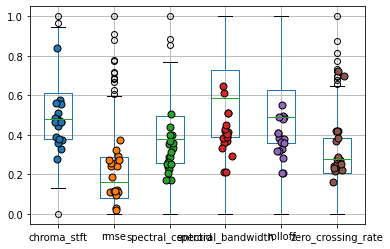

In [67]:
def plot_boxplot(features_raw, feature_normalize, column_names):
    print(column_names)
    features_sub = feature_normalize.loc[:, column_names]
    features_sub.head()
    features_sub.boxplot()
    
    for i,d in enumerate(features_sub):    
        y = features_sub.loc[features_raw['label'] == 'covid'][d]
        x = np.random.normal(i+1, 0.04, len(y))
        plt.plot(x, y, mec='k', ms=7, marker="o", linestyle="None")
        


['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


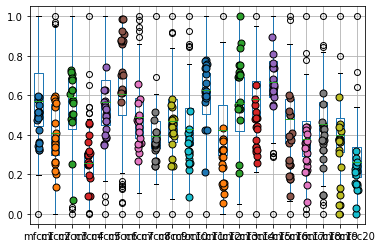

In [66]:
mfcc_attributes = []
for i in range(1, 21):
    mfcc_attributes.append(f'mfcc{i}')
plot_boxplot(features, features_normalize, mfcc_attributes)

['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']


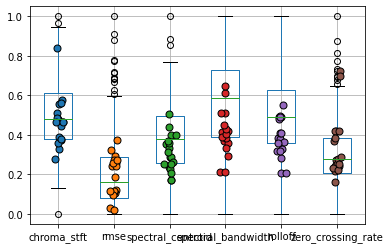

In [71]:
plot_boxplot(features, features_normalize, 
             ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'])



In [ ]:
import bnlearn as bn